In [128]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

#constants
grav = 9.81
mass = 1.552   
lxy = 0.25   
lz = 0.04
Ixx = (1/12)*(mass/4)*lz**2
Iyy = Ixx
Izz = (1/12)*(mass/4)*lz**2*2

tau_1 = 0.776
tau_2 = 0.776
tau_3 = 0.776
tau_4 = 0.776
Cl_Cd = 0.0001

In [ ]:
px_inW, py_inW, pz_inW = symbols('p_x, p_y, p_z')
vx_inB, vy_inB, vz_inB = symbols('v_x, v_y, v_z')
phi, theta, psi = symbols('phi, theta, psi')
wx_inB, wy_inB, wz_inB = symbols('omega_x, omega_y, omega_z')
taux_inB, tauy_inB, tauz_inB, fz_inB = symbols('tau_x, tau_y, tau_z, f_z')
print("symbols")

p_inW = Matrix([[px_inW],[py_inW], [pz_inW]])
v_inB = Matrix([[vx_inB],[vy_inB],[vz_inB]])
w_inB = Matrix([[wx_inB],[wy_inB], [wz_inB]])
Rx = Matrix([[1,0,0],[0, cos(phi), -sin(phi)],[0, sin(phi),  cos(phi)]])
Ry = Matrix([[ cos(theta), 0, sin(theta)],[0, 1,0], [-sin(theta), 0, cos(theta)]])
Rz = Matrix([[cos(psi), -sin(psi), 0],[sin(psi),  cos(psi), 0],[0,0,1]])
R_ofB_inW = Rz @ Ry @ Rx
R_ofW_inB = R_ofB_inW.T
pprint(R_ofW_inB)

tau_inB = Matrix([[taux_inB],
                      [tauy_inB],
                      [tauz_inB]])
tau_inB = simplify(tau_inB)
grav_inW = Matrix([[0.],
                       [0.],
                       [-mass * grav]])
grav_inB = R_ofW_inB @ grav_inW
f_inB = grav_inB + Matrix([[0.],
                               [0.],
                               [fz_inB]])
f_inB = simplify(f_inB)
pprint(f_inB)

Ixx = (1/12)*(mass/4)*lz**2
Iyy = Ixx
Izz = (1/12)*(mass/4)*lz**2*2
I_inB = Matrix([[Ixx, 0.,  0.],
                    [0.,  Iyy, 0.],
                    [0.,  0.,  Izz]])
pprint(I_inB)

v_inW = R_ofB_inW @ v_inB
xyz_dot = simplify(v_inW)
pprint(xyz_dot)

v_inB_dot = (1 / mass) * (f_inB - w_inB.cross(mass * v_inB))
v_inB_dot = simplify(v_inB_dot)
pprint(v_inB_dot)

ex = Matrix([[1], [0], [0]])
ey = Matrix([[0], [1], [0]])
ez = Matrix([[0], [0], [1]])
M = Matrix.hstack(ex, Rx.T@ey, (Ry@Rx).T@ez)
M_inv = simplify(M.inv())
rpy_dot = simplify(M_inv@w_inB)
pprint(rpy_dot)

w_inB_dot = I_inB.inv() @ (tau_inB - w_inB.cross(I_inB@w_inB))
w_inB_dot = simplify(w_inB_dot)
pprint(w_inB_dot)

f = Matrix.vstack(xyz_dot,
                      v_inB_dot,
                      rpy_dot,
                      w_inB_dot)
pprint(f)


symbols
⎡           cos(ψ)⋅cos(θ)                          sin(ψ)⋅cos(θ)               ↪
⎢                                                                              ↪
⎢sin(φ)⋅sin(θ)⋅cos(ψ) - sin(ψ)⋅cos(φ)  sin(φ)⋅sin(ψ)⋅sin(θ) + cos(φ)⋅cos(ψ)    ↪
⎢                                                                              ↪
⎣sin(φ)⋅sin(ψ) + sin(θ)⋅cos(φ)⋅cos(ψ)  -sin(φ)⋅cos(ψ) + sin(ψ)⋅sin(θ)⋅cos(φ)   ↪

↪    -sin(θ)   ⎤
↪              ⎥
↪ sin(φ)⋅cos(θ)⎥
↪              ⎥
↪ cos(φ)⋅cos(θ)⎦
⎡      15.22512⋅sin(θ)       ⎤
⎢                            ⎥
⎢  -15.22512⋅sin(φ)⋅cos(θ)   ⎥
⎢                            ⎥
⎣f_z - 15.22512⋅cos(φ)⋅cos(θ)⎦
⎡5.17333333333333e-5          0.0                  0.0         ⎤
⎢                                                              ⎥
⎢        0.0          5.17333333333333e-5          0.0         ⎥
⎢                                                              ⎥
⎣        0.0                  0.0          0.000103466666666667⎦
⎡vₓ⋅cos(ψ)⋅cos(θ) + v

In [ ]:
p_x_e = p_y_e = p_z_e = v_x_e = v_y_e = v_z_e = phi_e = theta_e = psi_e = omega_x_e = omega_y_e = omega_z_e = tau_x_e = tau_y_e = tau_z_e = 0
f_z_e = 4.905

m_e = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
n_e = np.array([0, 0, 0, 4.905])

f_num = lambdify([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB, taux_inB, tauy_inB, tauz_inB, fz_inB], f)
f_num(p_x_e, p_y_e, p_z_e, v_x_e, v_y_e, v_z_e, phi_e, theta_e, psi_e, omega_x_e, omega_y_e, omega_z_e, tau_x_e, tau_y_e, tau_z_e, f_z_e)

A_num = lambdify([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB, taux_inB, tauy_inB, tauz_inB, fz_inB], 
                 f.jacobian([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB]))
A = A_num(p_x_e, p_y_e, p_z_e, v_x_e, v_y_e, v_z_e, phi_e, theta_e, psi_e, omega_x_e, omega_y_e, omega_z_e, tau_x_e, tau_y_e, tau_z_e, f_z_e)
Matrix(A)

B_num = lambdify([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB, taux_inB, tauy_inB, tauz_inB, fz_inB], 
                 f.jacobian([taux_inB, tauy_inB, tauz_inB, fz_inB]))
B = B_num(p_x_e, p_y_e, p_z_e, v_x_e, v_y_e, v_z_e, phi_e, theta_e, psi_e, omega_x_e, omega_y_e, omega_z_e, tau_x_e, tau_y_e, tau_z_e, f_z_e)
Matrix(B)

n = A.shape[0]
Wc = B
for i in range(1, n):
    col = np.linalg.matrix_power(A, i) @ B
    Wc = np.block([Wc, col])
print(np.linalg.matrix_rank(Wc) == n)

C_num = lambdify([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB, taux_inB, tauy_inB, tauz_inB, fz_inB], 
                 g.jacobian([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB]))
C = C_num(p_x_e, p_y_e, p_z_e, v_x_e, v_y_e, v_z_e, phi_e, theta_e, psi_e, omega_x_e, omega_y_e, omega_z_e, tau_x_e, tau_y_e, tau_z_e, f_z_e)
Matrix(C)

D_num = lambdify([px_inW, py_inW, pz_inW, vx_inB, vy_inB, vz_inB, phi, theta, psi, wx_inB, wy_inB, wz_inB, taux_inB, tauy_inB, tauz_inB, fz_inB], 
                 g.jacobian([taux_inB, tauy_inB, tauz_inB, fz_inB]))
D = D_num(p_x_e, p_y_e, p_z_e, v_x_e, v_y_e, v_z_e, phi_e, theta_e, psi_e, omega_x_e, omega_y_e, omega_z_e, tau_x_e, tau_y_e, tau_z_e, f_z_e)
Matrix(D)

n = np.shape(A)[0]
Wo = C
for i in range(1, n):
    col = C@np.linalg.matrix_power(A, i)
    Wo = np.block([[Wo], [col]])
print(np.linalg.matrix_rank(Wo) == n)

def lqr(A,B,Q,R):
    P = linalg.solve_continuous_are(A, B, Q, R)
    K = linalg.inv(R) @  B.T @ P
    return K

Q = np.diag([1/(100**2), 1/(100**2), 1/(10**2), 1/(100**2), 1/(100**2), 1/(100**2), 1/(50**2), 1/(100**2), 1/(100**2), 1/(40**2), 1/(40**2), 1/(40**2)])
R = np.diag([1/0.3**2,1/0.3**2,1/0.3**2,1/15**2])
K = lqr(A,B,Q,R)
Matrix(K)

Ro = np.diag([1 ,1,1,1,1, 1, 1, 1, 1, 1, 1, 1])
Qo = np.diag([1, 1, 1, 1, 1, 1,1,1, 1, 1, 1,1])
L = lqr(A.T,C.T,linalg.inv(Ro),linalg.inv(Qo)).T

print(linalg.eigvals(A-B@K))
print(linalg.eigvals(A-L@C))

In [ ]:
class Controller():
    def __init__(self):
        # Initializing controller
        self.A = np.array(A, dtype=float)
        self.B = np.array(B, dtype=float)
        self.C = np.array(C, dtype=float)
        self.K = np.array(K, dtype=float)
        self.L = np.array(L, dtype=float)
        self.m_e = np.array([px_e, py_e, pz_e, vx_e, vy_e, vz_e, phi_e, theta_e, psi_e, omegax_e, omegay_e, omegaz_e])
        self.n_e = np.array([taux_e, tauy_e, tauz_e, fz_e])
        self.g_eq = g_eq
        self.e_max = 1.0
        self.phat_history = np.array([0.,0.,0.])
        self.pdes_history = np.array([0.,0.,0.])
        pass

    
    def reset(self):
        # Defining arrays for data collection
        self.xhat = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
        self.phat_history = np.array([0.,0.,0.])
        self.pdes_history = np.array([0.,0.,0.])
        pass
    
    
    def run(self, **kwargs):
        # Obtaining necessary variables
        self.dt = kwargs["dt"]
        self.p_hat = self.xhat[:3]
        
        # Constants
        k_attract = 10.    # ideal is 11.5
        k_repel = 1/10000       # ideal is 1.0
        k_des = 1.0        # ideal is 1.0
        r_drone = 0.8      # ideal is 0.8
        
        # Attractive Component
        h_attract = k_attract*(self.p_hat - self.p_des)/np.linalg.norm(self.p_hat - self.p_des)

        # Repulsive Component
        h_repel = 0
        for q in kwargs["pos_others"]:
            p_obst = q + r_drone*(self.p_hat - q)/np.linalg.norm(self.p_hat - q)
            grad_d = (self.p_hat - p_obst)/np.linalg.norm(self.p_hat - p_obst)
            d_p = np.linalg.norm(self.p_hat - p_obst) - r_drone
            h_repel += -k_repel*(grad_d/d_p**2)
        
        h = h_attract + h_repel
        
        # Minimizing error
        if np.linalg.norm(self.p_des - self.p_hat) < self.e_max:
            self.p_des = self.p_des
        else:
            self.p_des = self.p_hat - k_des*h
            
        self.x_des = np.block([self.p_des, np.zeros(9)])

        # Calculating gains
        u = - self.K@(self.xhat - self.x_des)
        inputs = u + self.n_e
        
        # Updating state estimate
        sensor = np.block([kwargs["mocap_1"], kwargs["mocap_2"], kwargs["mocap_3"], kwargs["mocap_4"]])
        y = sensor - self.g_eq
        self.xhat += self.dt * (self.A@self.xhat + self.B@u - self.L@(self.C@self.xhat - y))

        # Updating observer history
        self.phat_history = np.block([[self.phat_history], [self.xhat[:3]]])
        self.pdes_history = np.block([[self.pdes_history], [self.p_des]])
        
        return inputs

controller = Controller()

In [ ]:
import ae352_quadrotor.py

In [177]:
T_total = Cl_Cd*(tau_1+tau_2+tau_3+tau_4)
tau_phi = lz*Cl_Cd*(tau_1-tau_3)
tau_theta = lz*Cl_Cd*(tau_2-tau_4)
tau_psi = tau_1-tau_2+tau_3-tau_4
tau = Matrix([[tau_phi],[tau_theta],[tau_psi]])
print(T_total)

0.0003104


Final Z Position: 1.0000000000000002


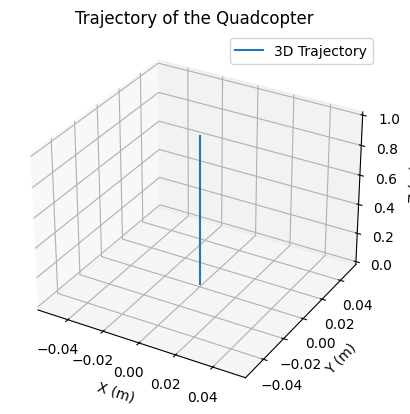

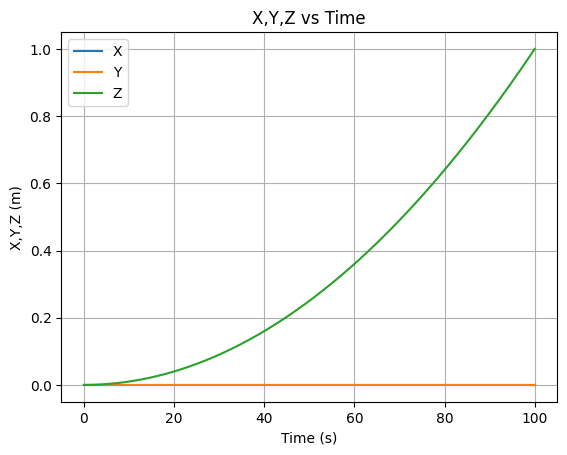

In [ ]:
from scipy.integrate import solve_ivp
x = 0
y = 0
z = 0
phi = 0
theta = 0
psi = 0
xdot = 0
ydot = 0
zdot = 0
wx = 1
wy = 1
wz = 1
wxdot = 0
wydot = 0
wzdot = 0

time = (0, 100)  
t_eval = np.linspace(time[0], time[1], 500) 

def EOM(t, state):
    x, y, z, xdot, ydot, zdot, phi, theta, psi, wx, wy, wz = state

    xdotdot = (1/mass)*(T_total*(sin(phi)*sin(psi)+sin(theta)*cos(phi)*cos(psi)))
    ydotdot = (1/mass)*(T_total*(-sin(phi)*sin(psi)+sin(psi)*sin(theta)*cos(phi)))
    zdotdot = (1/mass)*(T_total*cos(phi)*cos(theta))
    phidot = 0 #wx+wy*sin(phi)*tan(theta)+wz*cos(phi)*tan(theta)
    thetadot =0 # wy*cos(phi)-wz*sin(phi)
    psidot = 0 #(wy*sin(phi)+wz*cos(phi))/cos(theta)
    phidotdot = wxdot+wydot*sin(phi)*tan(theta)+wzdot*cos(phi)*tan(theta)+phidot*(wy*cos(phi)*tan(theta)-wz*sin(phi)*tan(theta))+thetadot*(1/cos(theta)**2)*(wy*sin(phi)+wz*cos(phi))
    thetadotdot = wydot*cos(phi)-wzdot*sin(phi)-phidot*(wy*sin(phi)+wz*cos(phi))
    psidotdot = (wydot*sin(phi)+wzdot*cos(phi)+(wy*cos(phi)-wz*sin(phi))*phidot+(wy*sin(phi)+wz*cos(phi)*sin(theta))*thetadot)/cos(theta)**2
    return [xdot, ydot, zdot, xdotdot, ydotdot, zdotdot, phidot, thetadot, psidot, phidotdot, thetadotdot, psidotdot]

state = [x, y, z, xdot, ydot, zdot, phi, theta, psi, wx, wy, wz]
solution = solve_ivp(EOM, time, state, t_eval=t_eval, method='RK45')
x, y, z,phi,theta,psi = solution.y[0:6]
print('Final Z Position:', z[-1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='3D Trajectory')
ax.set_title('Trajectory of the Quadcopter')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.legend()
plt.show()

plt.figure()
plt.plot(t_eval, x, label='X')
plt.plot(t_eval, y, label='Y')
plt.plot(t_eval, z, label='Z')
plt.title('X,Y,Z vs Time')
plt.xlabel('Time (s)')
plt.ylabel('X,Y,Z (m)')
plt.legend()
plt.grid()
plt.show()

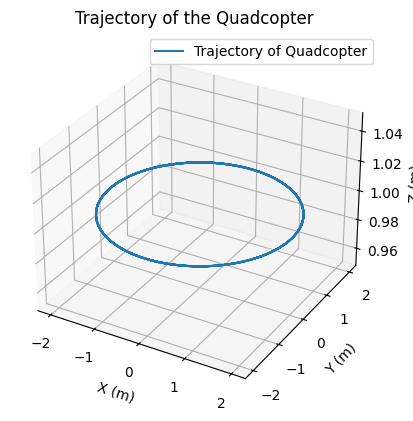

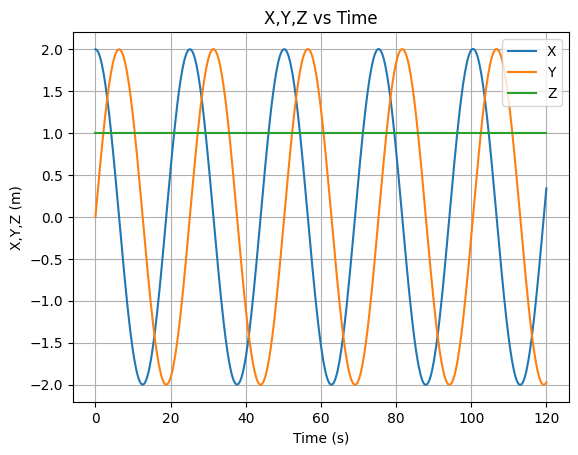

In [207]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tau_1 = tau_2 = tau_3 = tau_4 = 3
T_total = Cl_Cd * (tau_1 + tau_2 + tau_3 + tau_4)
radius = 2
omega = 0.5/radius

x, y, z = radius, 0, 1 
phi, theta, psi = 0, 0, 0
xdot, ydot, zdot = 0, omega * radius, 0  
wx, wy, wz = 0, 0, 0 

time = (0, 120)
t_eval = np.linspace(time[0], time[1], 500)

def EOM(t, state):
    x, y, z, xdot, ydot, zdot, phi, theta, psi, wx, wy, wz = state

    xdotdot = -omega**2 * x 
    ydotdot = -omega**2 * y
    zdotdot = 0 
    
    phidot = 0
    thetadot = 0
    psidot = omega 
    phidotdot = wxdot + wydot * np.sin(phi) * np.tan(theta) + wzdot * np.cos(phi) * np.tan(theta)
    thetadotdot = wydot * np.cos(phi) - wzdot * np.sin(phi)
    psidotdot = wydot * np.sin(phi) + wzdot * np.cos(phi)
    

    return [xdot, ydot, zdot, xdotdot, ydotdot, zdotdot, phidot, thetadot, psidot, phidotdot, thetadotdot, psidotdot]

state = [x, y, z, xdot, ydot, zdot, phi, theta, psi, wx, wy, wz]

solution = solve_ivp(EOM, time, state, t_eval=t_eval, method='RK45')

x, y, z = solution.y[0], solution.y[1], solution.y[2]
xdot, ydot, zdot = solution.y[3], solution.y[4], solution.y[5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Trajectory of Quadcopter')
ax.set_title('Trajectory of the Quadcopter')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.legend()
plt.show()

plt.figure()
plt.plot(t_eval, x, label='X')
plt.plot(t_eval, y, label='Y')
plt.plot(t_eval, z, label='Z')
plt.title('X,Y,Z vs Time')
plt.xlabel('Time (s)')
plt.ylabel('X,Y,Z (m)')
plt.legend()
plt.grid()
plt.show()


0.0
5.0
5.0


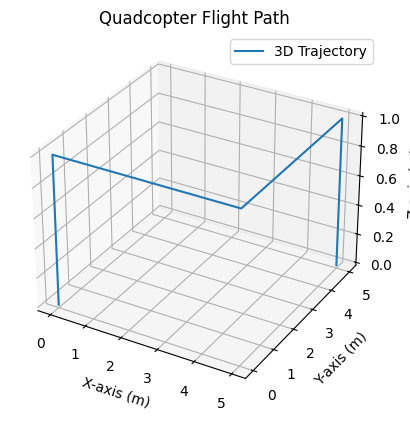

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

T_hover = mass * grav

# Define Equations of Motion for Each Phase
def EOM_takeoff(t, state):
    x, y, z, xdot, ydot, zdot = state
    T_total = T_hover + max(0, (1 - z) * 10)  # Gradually reduce thrust as it approaches 1m
    zdotdot = T_total / mass - g
    return [xdot, ydot, zdot, 0, 0, zdotdot]

def EOM_line1(t, state):
    x, y, z, xdot, ydot, zdot = state
    xdotdot = 0
    ydotdot = 0
    zdotdot = 0
    return [xdot, ydot, zdot, 1, 0, zdotdot]  # Move at 1 m/s along x

def EOM_hover(t, state):
    x, y, z, xdot, ydot, zdot = state
    return [0, 0, 0, 0, 0, 0]  # Hover, no motion

def EOM_yaw(t, state):
    x, y, z, psi = state
    yaw_rate = np.pi / 2 / 2  # 90-degree yaw in 2 seconds
    return [0, 0, 0, yaw_rate]

def EOM_line2(t, state):
    x, y, z, xdot, ydot, zdot = state
    xdotdot = 0
    ydotdot = 0
    zdotdot = 0
    return [xdot, ydot, zdot, 0, 1, zdotdot]  # Move at 1 m/s along y

def EOM_land(t, state):
    x, y, z, xdot, ydot, zdot = state
    zdotdot = max(-g * 0.01 / zdot, -g) if zdot != 0 else 0  # Controlled descent
    return [xdot, ydot, zdot, 0, 0, zdotdot]

# Time Steps for Each Phase
t_eval = {
    "takeoff": np.linspace(0, 0.62, 100),
    "fiveup": np.linspace(0, 1, 100),
    "hover1": np.linspace(0, 2, 50),
    "fiveleft": np.linspace(0, 0.01, 100),
    "hover2": np.linspace(0, 1, 50),
    "land": np.linspace(0, 2, 200),
}

# Initial Conditions for Each Phase
state = {
    "takeoff": [0, 0, 0, 0, 0, 0],
    "fiveup": [0,0,1,0,0,0], 
    "hover1": [5,0,1,0,0,0],
    "fiveleft": [5,5,1,0,0,0], 
    "hover2": [5,5,1,0,0,0], 
    "land": [5,5,0,0,0,0],  
}

solution = {}
solution["takeoff"] = solve_ivp(EOM_takeoff, [0, 5], state["takeoff"], t_eval=t_eval["takeoff"])
solution["fiveup"] = solve_ivp(EOM_line1, [0, 5], state["fiveup"], t_eval=t_eval["fiveup"])
solution["hover1"] = solve_ivp(EOM_hover, [0, 2], state["hover1"], t_eval=t_eval["hover1"])
solution["fiveleft"] = solve_ivp(EOM_line2, [0, 5], state["fiveleft"], t_eval=t_eval["fiveleft"])
solution["hover2"] = solve_ivp(EOM_hover, [0, 2], state["hover2"], t_eval=t_eval["hover2"])
solution["land"] = solve_ivp(EOM_land, [0, 10], state["land"], t_eval=t_eval["land"])

x, y, z = [], [], []
for key in solution:
    x.extend(solution[key].y[0])
    y.extend(solution[key].y[1])
    z.extend(solution[key].y[2])

print(z[-1])
print(y[-1])
print(x[-1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='3D Trajectory')
ax.set_title('Quadcopter Flight Path')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.legend()
plt.show()


time = (0, 120)  
t_eval = np.linspace(time[0], time[1], 500)
t = []
for key in solution:
    t.extend(solution[key].t)

